In [39]:
# Import necessary libraries
import pandas as pd


In [40]:
data = pd.read_csv('/Users/user/Downloads/churn-bigml-20.csv')

In [41]:
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [42]:
# Load data for cleaning

data = "/Users/user/Downloads/churn-bigml-20.csv" 

def load_and_clean_dataset(data):
    # Load the dataset
    try:
        data = pd.read_csv(data)
    except FileNotFoundError:
        print("File not found. Please check the data.")
        return None
    except Exception as e:
        print("An error occurred while loading the dataset:", e)
        return None

    # Data cleaning steps
      
    # Remove duplicate rows
    data = data.drop_duplicates()

    # Handle missing values
    data = data.dropna()

    # Perform other cleaning operations as required

    return data






file_path = "/Users/user/Downloads/churn-bigml-20.csv"  #  dataset file path
cleaned_df = load_and_clean_dataset(data)

# Check if the dataset is loaded and cleaned successfully
if cleaned_df is not None:
    print("Dataset loaded and cleaned successfully.")
    # Save the cleaned dataset to a new CSV file
    cleaned_data = "cleaned_dataset.csv"  # Change this to the desired file path
    cleaned_df.to_csv(cleaned_data, index=False)
    print("Cleaned dataset saved to:", cleaned_data)
else:
    print("Failed to load or clean the dataset.")




Dataset loaded and cleaned successfully.
Cleaned dataset saved to: cleaned_dataset.csv


In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [44]:
# Load cleaned dataset
import pandas as pd
cleaned_dataset = pd.read_csv('/Users/user/cleaned_dataset.csv')

In [45]:
print(cleaned_dataset)

    State  Account length  Area code International plan Voice mail plan  \
0      LA             117        408                 No              No   
1      IN              65        415                 No              No   
2      NY             161        415                 No              No   
3      SC             111        415                 No              No   
4      HI              49        510                 No              No   
..    ...             ...        ...                ...             ...   
662    WI             114        415                 No             Yes   
663    AL             106        408                 No             Yes   
664    VT              60        415                 No              No   
665    WV             159        415                 No              No   
666    CT             184        510                Yes              No   

     Number vmail messages  Total day minutes  Total day calls  \
0                        0       

In [48]:
from sklearn.preprocessing import LabelEncoder
# Step 3: Split the data into training and testing sets
X = cleaned_dataset.drop('Total intl charge', axis=1)  # Features
y = cleaned_dataset['Total intl charge']  # Target variable

from sklearn.preprocessing import LabelEncoder

# Assuming 'cleaned_dataset' and 'data' are DataFrames
categorical_cols = cleaned_dataset.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()

for col in categorical_cols:
  # Encode the column in 'cleaned_dataset' using the encoder fit on data from the same column
  cleaned_dataset[col] = label_encoder.fit_transform(cleaned_dataset[col])

# ... rest of your code (one-hot encoding, etc.)


# Convert categorical variables into dummy/indicator variables (one-hot encoding)
cleaned_dataset = pd.get_dummies(cleaned_dataset)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
# Step 4: Build and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [50]:
# Step 5: Evaluate the model's performance using relevant metrics
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 8.630576294646724e-06
R-squared: 0.9999864732809061


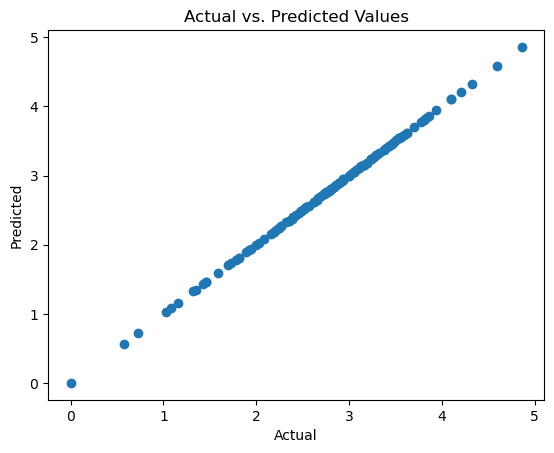

In [51]:
# Visualization:
# Plotting actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted Values")
plt.show()